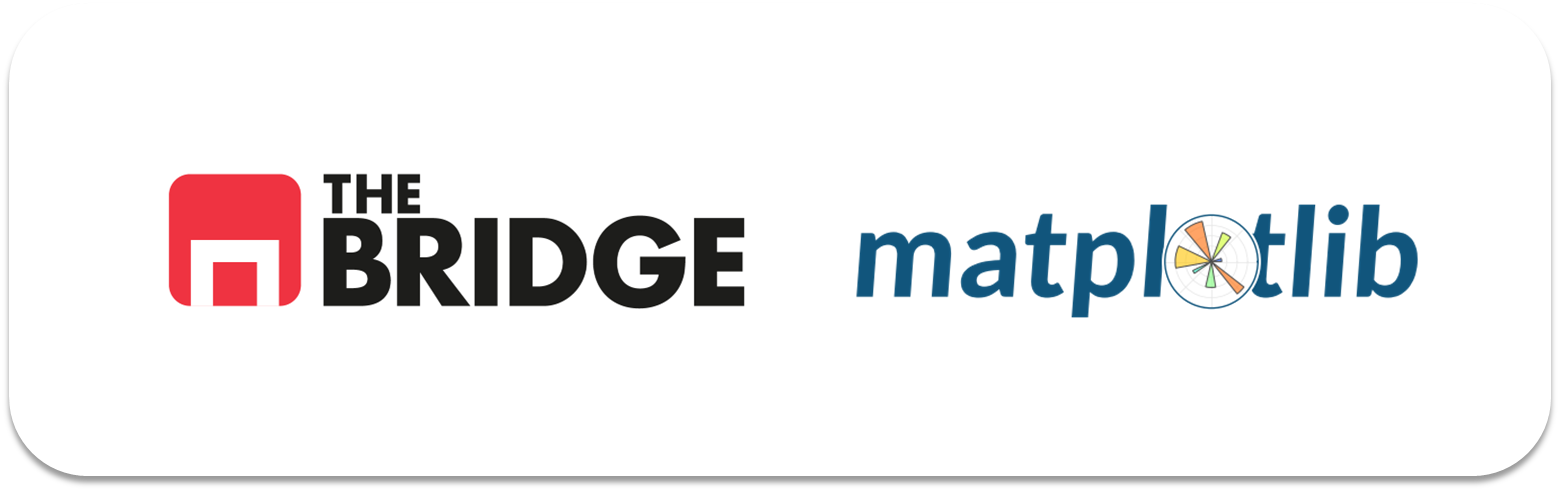

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Ejercicio 1

#### #1.1

- Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("california_cities.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [3]:
df.dropna(axis = "index", inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center" o investigar como funciona bar_label). Los colores de las barras deben tener un 50% de transparencia y ser: azul, gris, rojo, aceituna y marrón.  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Arial", tamaño = 14, peso = "Bold", color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion. Transparencia al 50% y color verde.
4. El boxplot de la altura de las ciudades.

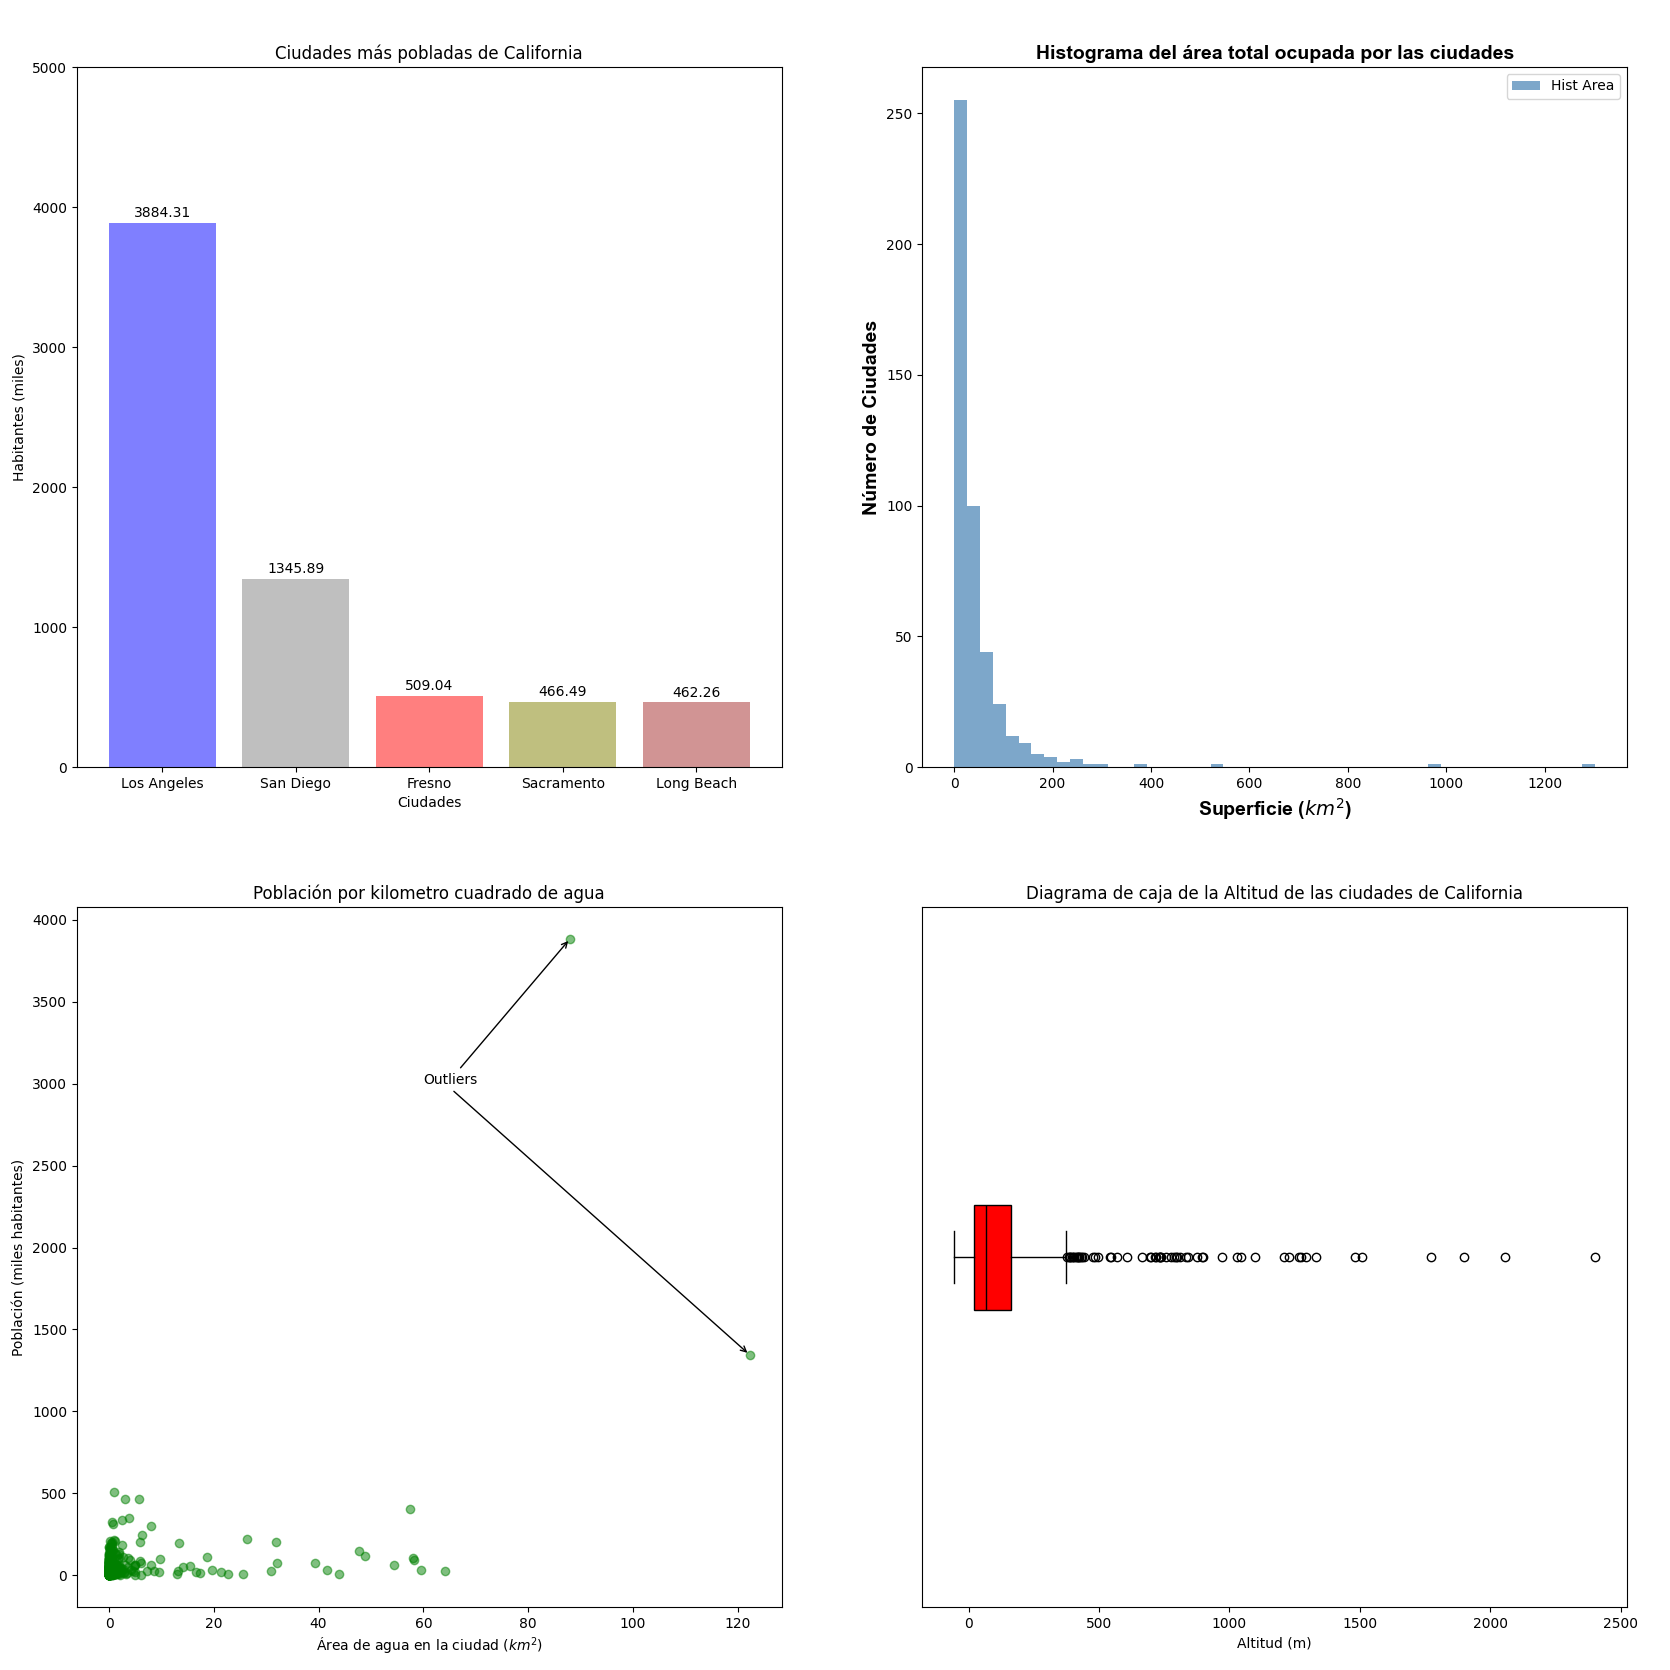

In [ ]:
categorias = ['Categoría A', 'Categoría B', 'Categoría C']
valores = [23, 45, 56]
# Crear gráfico de barras
plt.bar(categorias, valores);


In [5]:
df.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

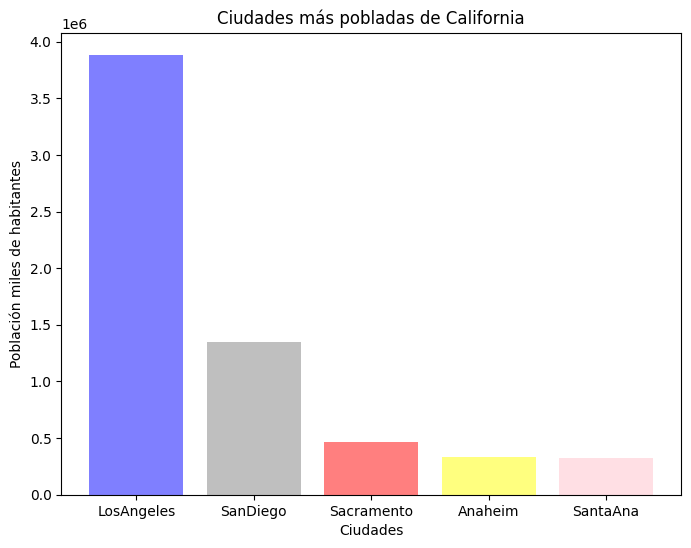

In [14]:
top_5 = df.nlargest(5, "population_total")
fig, ax = plt.subplots(1,1, figsize = (8,6))
colores = ['blue', 'gray', 'red', 'yellow', 'pink']
ax.bar(top_5["city"], top_5["population_total"], alpha = 0.5, color = colores)
ax.set_xlabel("Ciudades")
ax.set_ylabel("Población miles de habitantes")
ax.set_title("Ciudades más pobladas de California")
plt.show()


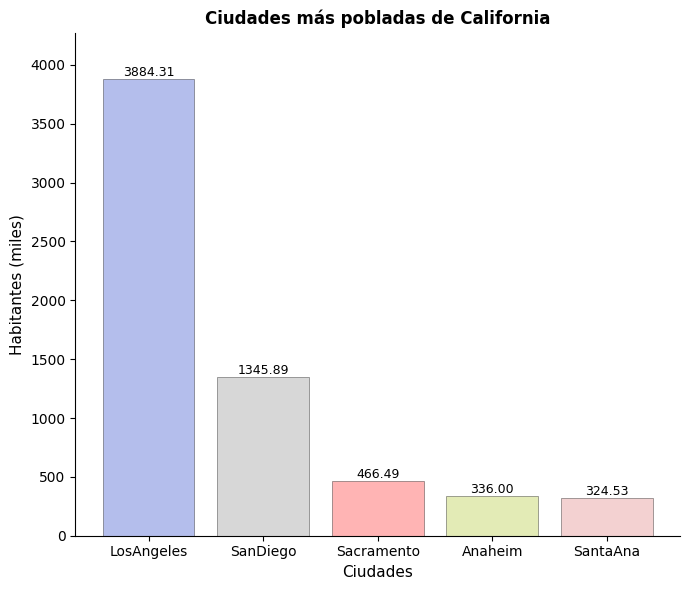

In [16]:
# Top 5 ciudades más pobladas
top_5 = df.nlargest(5, "population_total")

# Crear figura (tamaño ajustado a la imagen)
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

# Colores exactos de la imagen (en orden: azul, gris, rojo/salmon, verde oliva, rosa)
colores = ['#6A7FDB', '#B0B0B0', '#FF6B6B', '#C8D96F', '#E8A5A5']

# Crear barras
barras = ax.bar(
    top_5["city"], 
    top_5["population_total"] / 1000,  # Convertir a miles si es necesario
    alpha=0.5,  # 50% transparencia
    color=colores,
    edgecolor='black',  # Borde negro (opcional, según imagen)
    linewidth=0.5
)

# Agregar valores encima de las barras
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura,
        f'{altura:.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Etiquetas y título
ax.set_xlabel("Ciudades", fontsize=11)
ax.set_ylabel("Habitantes (miles)", fontsize=11)
ax.set_title("Ciudades más pobladas de California", fontsize=12, fontweight='bold')

# Ajustar límite del eje Y para que los valores no se corten
ax.set_ylim(0, max(top_5["population_total"] / 1000) * 1.1)

# Rotar nombres de ciudades
plt.xticks(rotation=0)  # Sin rotación si caben bien

# Quitar bordes superiores y derecho (estilo más limpio)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

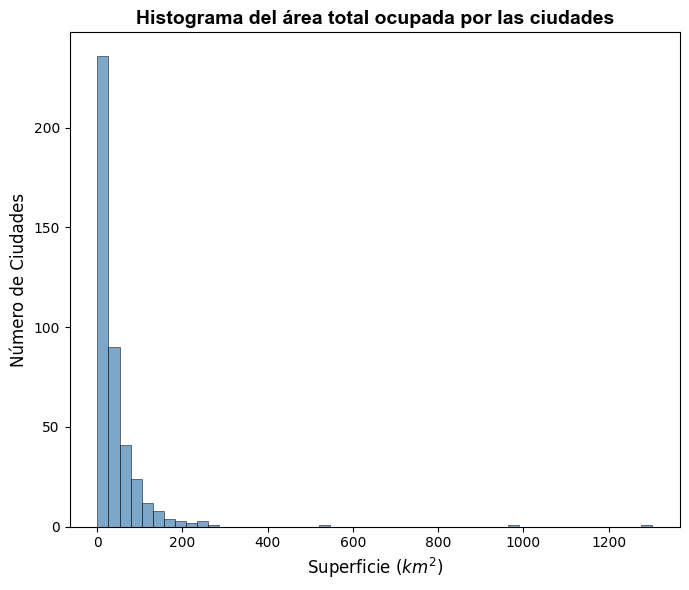

In [ ]:
# Histograma del área total ocupada por las ciudades
# 50 bins, tamaño = 14, peso = "Bold", color azul acero, steelblue

plt.figure(figsize=(7, 6))

plt.hist(
    df['area_total_km2'], 
    bins=50, 
    color='steelblue', 
    alpha=0.7,
    edgecolor='black',
    linewidth=0.5
)

plt.xlabel('Superficie $(km^2)$', fontsize=12)
plt.ylabel('Número de Ciudades', fontsize=12)
plt.title('Histograma del área total ocupada por las ciudades', 
          fontsize=14, fontweight='bold', fontname='Arial')

plt.tight_layout()
plt.show()

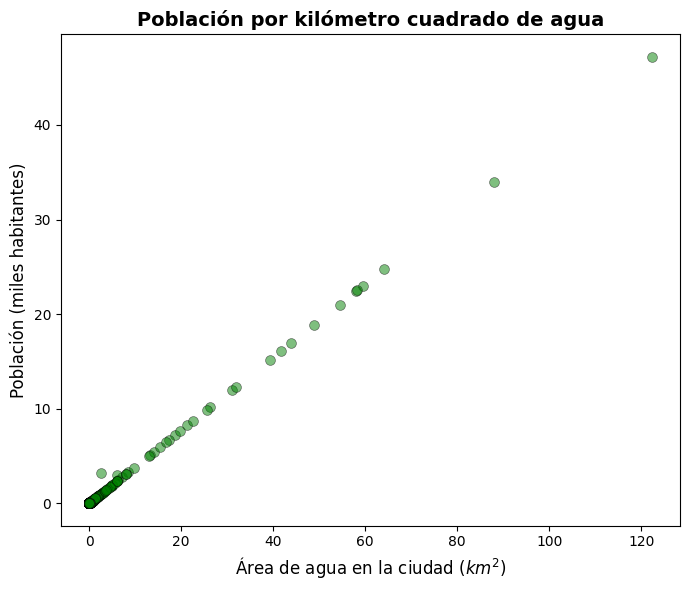

In [19]:

# El scatter de área de agua con su población
# Transparencia al 50% y color verde

plt.figure(figsize=(7, 6))

plt.scatter(
    df['area_water_km2'], 
    df['area_water_sq_mi'],  
    alpha=0.5,
    color='green',
    s=50,  # tamaño de los puntos
    edgecolor='black',
    linewidth=0.5
)

plt.xlabel('Área de agua en la ciudad $(km^2)$', fontsize=12)
plt.ylabel('Población (miles habitantes)', fontsize=12)
plt.title('Población por kilómetro cuadrado de agua', fontsize=14, fontweight='bold')

# Agregar anotación "Outliers" si hay valores extremos
# (ajustar coordenadas según tus datos)
plt.annotate('Outliers', 
             xy=(60, 3000),  # Posición del punto
             fontsize=10,
             ha='center')

plt.tight_layout()
plt.show()

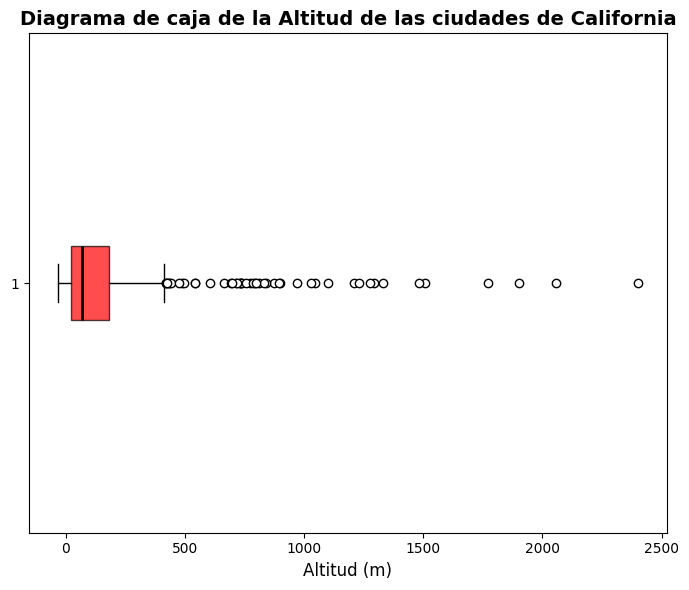

In [20]:
# El boxplot de la altura de las ciudades

plt.figure(figsize=(7, 6))

plt.boxplot(
    df['elevation_m'],
    vert=False,  # Horizontal
    patch_artist=True,  # Permite colorear
    boxprops=dict(facecolor='red', alpha=0.7),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='white', 
                   markeredgecolor='black', markersize=6)
)

plt.xlabel('Altitud (m)', fontsize=12)
plt.title('Diagrama de caja de la Altitud de las ciudades de California', 
          fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.